![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_negation_classifier_demo_biological_texts.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 Class Biological Negation Classifer Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training  data  : 

<br> 

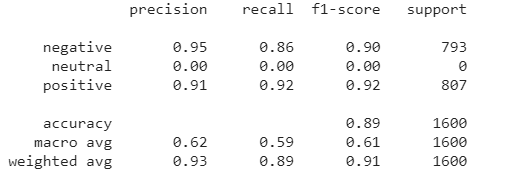


You can achieve these results or even better on this dataset with test  data  : 

<br> 


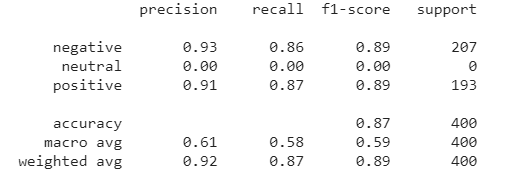










# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
import nlu

--2021-05-05 04:02:31--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-05 04:02:31 (36.7 MB/s) - written to stdout [1671/1671]

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
     |████████████████████████████████| 204.8MB 72kB/s 
     |████████████████████████████████| 153kB 51.4MB/s 
     |████████████████████████████████| 204kB 22.1MB/s 
     |████████████████████████████████| 204kB 49.6MB/s 


# 2. Download   Negation Bilogical Texts dataset 
https://www.kaggle.com/ma7555/bioscope-corpus-negation-annotated
#Context
The BioScope corpus consists of medical and biological texts annotated for negation and their linguistic scope. This was done to allow a comparison between the development of systems for negation/hedge detection and scope resolution.
The corpus is publicly available for research purposes.

You can use this corpus to fine-tune a BERT-like model for negation detection.

This dataset was created in this format during the COVID-19 crisis as a training set for detecting negations regarding treatment of specific drugs in the released research papers.

Creators of the original dataset: MTA-SZTE Research Group on Artificial Intelligence - RGAI
https://rgai.inf.u-szeged.hu/node/105


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/bioscope_abstract.csv


--2021-05-05 04:04:31--  http://ckl-it.de/wp-content/uploads/2021/02/bioscope_abstract.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 802898 (784K) [text/csv]
Saving to: ‘bioscope_abstract.csv’

bioscope_abstract.c 100%[===================>] 784.08K  1.21MB/s    in 0.6s    

2021-05-05 04:04:32 (1.21 MB/s) - ‘bioscope_abstract.csv’ saved [802898/802898]



In [ ]:
import pandas as pd
train_path = '/content/bioscope_abstract.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
train_df = train_df.dropna()
train_df = train_df.sample(frac=1).reset_index(drop=True)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
85,The mAb failed to induce NF-kappa B/Rel nuclea...,positive
937,Because these induced gene products have NF-ka...,negative
1707,H2O2-induced NF-kappaB activation in Wurzburg ...,positive
1029,The carboxyl-terminal cytoplasmic domain of CD...,negative
258,Pretreatment with actinomycin D and cyclohexim...,negative
...,...,...
516,The finding that dexamethasone has no effect o...,positive
1870,IL-4 secreted by activated T cells is a pleiot...,negative
380,"In contrast to wild-type B cells, neither of t...",positive
684,The IL-12 nonresponsiveness of the Th2 clones ...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
from sklearn.metrics import classification_report

# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        24
    positive       0.52      1.00      0.68        26

    accuracy                           0.52        50
   macro avg       0.26      0.50      0.34        50
weighted avg       0.27      0.52      0.36        50



,y,text,trained_sentiment,sentence,origin_index,document,sentence_embedding_use,trained_sentiment_confidence
0,positive,The mAb failed to induce NF-kappa B/Rel nuclea...,positive,[The mAb failed to induce NF-kappa B/Rel nucle...,85,The mAb failed to induce NF-kappa B/Rel nuclea...,"[-0.021044651046395302, -0.012281016446650028,...",0.718423
1,negative,Because these induced gene products have NF-ka...,positive,[Because these induced gene products have NF-k...,937,Because these induced gene products have NF-ka...,"[-0.018397482112050056, -0.0002952178183477372...",0.656633
2,positive,H2O2-induced NF-kappaB activation in Wurzburg ...,positive,[H2O2-induced NF-kappaB activation in Wurzburg...,1707,H2O2-induced NF-kappaB activation in Wurzburg ...,"[0.04317500814795494, 0.00023781821073498577, ...",0.721148
3,negative,The carboxyl-terminal cytoplasmic domain of CD...,positive,[The carboxyl-terminal cytoplasmic domain of C...,1029,The carboxyl-terminal cytoplasmic domain of CD...,"[0.0399024672806263, 0.06178785115480423, -0.0...",0.702527
4,negative,Pretreatment with actinomycin D and cyclohexim...,positive,[Pretreatment with actinomycin D and cyclohexi...,258,Pretreatment with actinomycin D and cyclohexim...,"[0.03217654675245285, -0.031980931758880615, 0...",0.716568
5,positive,"On the other hand, phorbol ester-induced produ...",positive,"[On the other hand, phorbol ester-induced prod...",1839,"On the other hand, phorbol ester-induced produ...","[0.05933626368641853, 0.06317632645368576, 0.0...",0.712259
6,positive,Activated Rac-1 could mimic activated p21ras t...,positive,[Activated Rac-1 could mimic activated p21ras ...,1552,Activated Rac-1 could mimic activated p21ras t...,"[0.012313981540501118, -0.05240459367632866, -...",0.694476
7,negative,"After a 2-day incubation in LDL, the binding o...",positive,"[After a 2-day incubation in LDL, the binding ...",942,"After a 2-day incubation in LDL, the binding o...","[0.01922391913831234, -0.05796779692173004, -0...",0.673653
8,negative,As evidenced by electro mobility shift assay (...,positive,[As evidenced by electro mobility shift assay ...,383,As evidenced by electro mobility shift assay (...,"[0.004417878575623035, -0.020263247191905975, ...",0.698439
9,negative,Mutations at the B2 site abolish this transcri...,positive,[Mutations at the B2 site abolish this transcr...,1515,Mutations at the B2 site abolish this transcri...,"[0.021449951454997063, 0.017173701897263527, -...",0.679992


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict("The virus had a direct impact on the nervous system")

,trained_sentiment,sentence,origin_index,document,sentence_embedding_use,trained_sentiment_confidence
0,positive,[The virus had a direct impact on the nervous ...,0,The virus had a direct impact on the nervous s...,"[0.005800435319542885, 0.02561130002140999, -0...",0.67287


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(1)                 | Info: Maximum number of epochs to train | Currently set to : 1
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe['sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        24
     neutral       0.00      0.00      0.00         0
    positive       0.76      0.96      0.85        26

    accuracy                           0.50        50
   macro avg       0.25      0.32      0.28        50
weighted avg       0.39      0.50      0.44        50



,y,text,trained_sentiment,sentence,origin_index,document,sentence_embedding_use,trained_sentiment_confidence
0,positive,The mAb failed to induce NF-kappa B/Rel nuclea...,positive,[The mAb failed to induce NF-kappa B/Rel nucle...,85,The mAb failed to induce NF-kappa B/Rel nuclea...,"[-0.021044651046395302, -0.012281016446650028,...",0.750314
1,negative,Because these induced gene products have NF-ka...,neutral,[Because these induced gene products have NF-k...,937,Because these induced gene products have NF-ka...,"[-0.018397482112050056, -0.0002952178183477372...",0.524412
2,positive,H2O2-induced NF-kappaB activation in Wurzburg ...,positive,[H2O2-induced NF-kappaB activation in Wurzburg...,1707,H2O2-induced NF-kappaB activation in Wurzburg ...,"[0.04317500814795494, 0.00023781821073498577, ...",0.771501
3,negative,The carboxyl-terminal cytoplasmic domain of CD...,positive,[The carboxyl-terminal cytoplasmic domain of C...,1029,The carboxyl-terminal cytoplasmic domain of CD...,"[0.0399024672806263, 0.06178785115480423, -0.0...",0.703551
4,negative,Pretreatment with actinomycin D and cyclohexim...,positive,[Pretreatment with actinomycin D and cyclohexi...,258,Pretreatment with actinomycin D and cyclohexim...,"[0.03217654675245285, -0.031980931758880615, 0...",0.695075
5,positive,"On the other hand, phorbol ester-induced produ...",positive,"[On the other hand, phorbol ester-induced prod...",1839,"On the other hand, phorbol ester-induced produ...","[0.05933626368641853, 0.06317632645368576, 0.0...",0.776027
6,positive,Activated Rac-1 could mimic activated p21ras t...,positive,[Activated Rac-1 could mimic activated p21ras ...,1552,Activated Rac-1 could mimic activated p21ras t...,"[0.012313981540501118, -0.05240459367632866, -...",0.816325
7,negative,"After a 2-day incubation in LDL, the binding o...",positive,"[After a 2-day incubation in LDL, the binding ...",942,"After a 2-day incubation in LDL, the binding o...","[0.01922391913831234, -0.05796779692173004, -0...",0.645191
8,negative,As evidenced by electro mobility shift assay (...,positive,[As evidenced by electro mobility shift assay ...,383,As evidenced by electro mobility shift assay (...,"[0.004417878575623035, -0.020263247191905975, ...",0.670496
9,negative,Mutations at the B2 site abolish this transcri...,neutral,[Mutations at the B2 site abolish this transcr...,1515,Mutations at the B2 site abolish this transcri...,"[0.021449951454997063, 0.017173701897263527, -...",0.548251


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(120)  
trainable_pipe['sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.95      0.86      0.90       791
     neutral       0.00      0.00      0.00         0
    positive       0.91      0.92      0.92       809

    accuracy                           0.89      1600
   macro avg       0.62      0.59      0.61      1600
weighted avg       0.93      0.89      0.91      1600



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

              precision    recall  f1-score   support

    negative       0.92      0.81      0.86       209
     neutral       0.00      0.00      0.00         0
    positive       0.85      0.89      0.87       191

    accuracy                           0.85       400
   macro avg       0.59      0.57      0.58       400
weighted avg       0.89      0.85      0.86       400



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('The virus had a direct impact on the nervous system')
preds

,sentiment_confidence,sentence,text,sentence_embedding_from_disk,sentiment,document,origin_index
0,[0.9973864],[The virus had a direct impact on the nervous ...,The virus had a direct impact on the nervous s...,"[[0.19975340366363525, 0.40417489409446716, 0....",[negative],The virus had a direct impact on the nervous s...,8589934592


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.anno